In [1]:
import numpy as np 
import pandas as pd 
import os


In [2]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
#可以看到背景是一种白色的，选择风格为white的绘制的正弦结果
sns.set_style('whitegrid')
#内嵌画图 可以省去plt.show()
%matplotlib inline
from tensorflow.keras.utils import plot_model

# 分割数据
from sklearn.model_selection import train_test_split

# Metrics 
from sklearn.metrics import confusion_matrix, classification_report

# Deep Learning
import tensorflow as tf
print('TensoFlow Version: ', tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
#from tensorflow.keras.applications.resnet import ResNet50

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

E:\AS\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\AS\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\AS\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\AS\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

TensoFlow Version:  1.14.0


In [3]:
# 导入数据导入数据   https://www.kaggle.com/flo2607/traffic-signs-classification
path = r'D:\Google下载、\traffic\traffic-signs-classification'
lab = pd.read_csv(r'D:\Google下载、\traffic\traffic-signs-classification\labels.csv')

In [60]:
a = dict(one=1, two=2, three=3)
b = {'one': 1, 'two': 2, 'three': 3}
c = dict(zip(['one', 'two', 'three'], [1, 2, 3]))
d = dict([('two', 2), ('one', 1), ('three', 3)])
e = dict({'three': 3, 'one': 1, 'two': 2})
print(a == b == c == d == e)

True


In [4]:
# 统计样本数 并使其对应
d = dict()
class_labels = dict()
for dirs in os.listdir(path + '/myData'):
    #count=每个文件夹下图片的个数
    count = len(os.listdir(path+'/myData/'+dirs))
    # 使类别名称和数量对应
    d[dirs+' => '+lab[lab.ClassId == int(dirs)].values[0][1]] = count
    #使文件夹名称和原本名称对应
    class_labels[int(dirs)] = lab[lab.ClassId == int(dirs)].values[0][1]
    print(dirs,"的个数是",count,">>",lab[lab.ClassId == int(dirs)].values[0][1])
d,class_labels,

0 的个数是 451 >> Speed limit (20km/h)
1 的个数是 4920 >> Speed limit (30km/h)
10 的个数是 3810 >> No passing for vechiles over 3.5 metric tons
11 的个数是 2490 >> Right-of-way at the next intersection
12 的个数是 3990 >> Priority road
13 的个数是 4080 >> Yield
14 的个数是 1470 >> Stop
15 的个数是 1170 >> No vechiles
16 的个数是 780 >> Vechiles over 3.5 metric tons prohibited
17 的个数是 2100 >> No entry
18 的个数是 2280 >> General caution
19 的个数是 390 >> Dangerous curve to the left
2 的个数是 2610 >> Speed limit (50km/h)
20 的个数是 660 >> Dangerous curve to the right
21 的个数是 600 >> Double curve
22 的个数是 720 >> Bumpy road
23 的个数是 960 >> Slippery road
24 的个数是 510 >> Road narrows on the right
25 的个数是 2850 >> Road work
26 的个数是 1140 >> Traffic signals
27 的个数是 450 >> Pedestrians
28 的个数是 1020 >> Children crossing
29 的个数是 510 >> Bicycles crossing
3 的个数是 2670 >> Speed limit (60km/h)
30 的个数是 840 >> Beware of ice/snow
31 的个数是 1470 >> Wild animals crossing
32 的个数是 450 >> End of all speed and passing limits
33 的个数是 1288 >> Turn right ahead
34 的个数是 7

({'0 => Speed limit (20km/h)': 451,
  '1 => Speed limit (30km/h)': 4920,
  '10 => No passing for vechiles over 3.5 metric tons': 3810,
  '11 => Right-of-way at the next intersection': 2490,
  '12 => Priority road': 3990,
  '13 => Yield': 4080,
  '14 => Stop': 1470,
  '15 => No vechiles': 1170,
  '16 => Vechiles over 3.5 metric tons prohibited': 780,
  '17 => No entry': 2100,
  '18 => General caution': 2280,
  '19 => Dangerous curve to the left': 390,
  '2 => Speed limit (50km/h)': 2610,
  '20 => Dangerous curve to the right': 660,
  '21 => Double curve': 600,
  '22 => Bumpy road': 720,
  '23 => Slippery road': 960,
  '24 => Road narrows on the right': 510,
  '25 => Road work': 2850,
  '26 => Traffic signals': 1140,
  '27 => Pedestrians': 450,
  '28 => Children crossing': 1020,
  '29 => Bicycles crossing': 510,
  '3 => Speed limit (60km/h)': 2670,
  '30 => Beware of ice/snow': 840,
  '31 => Wild animals crossing': 1470,
  '32 => End of all speed and passing limits': 450,
  '33 => Turn r

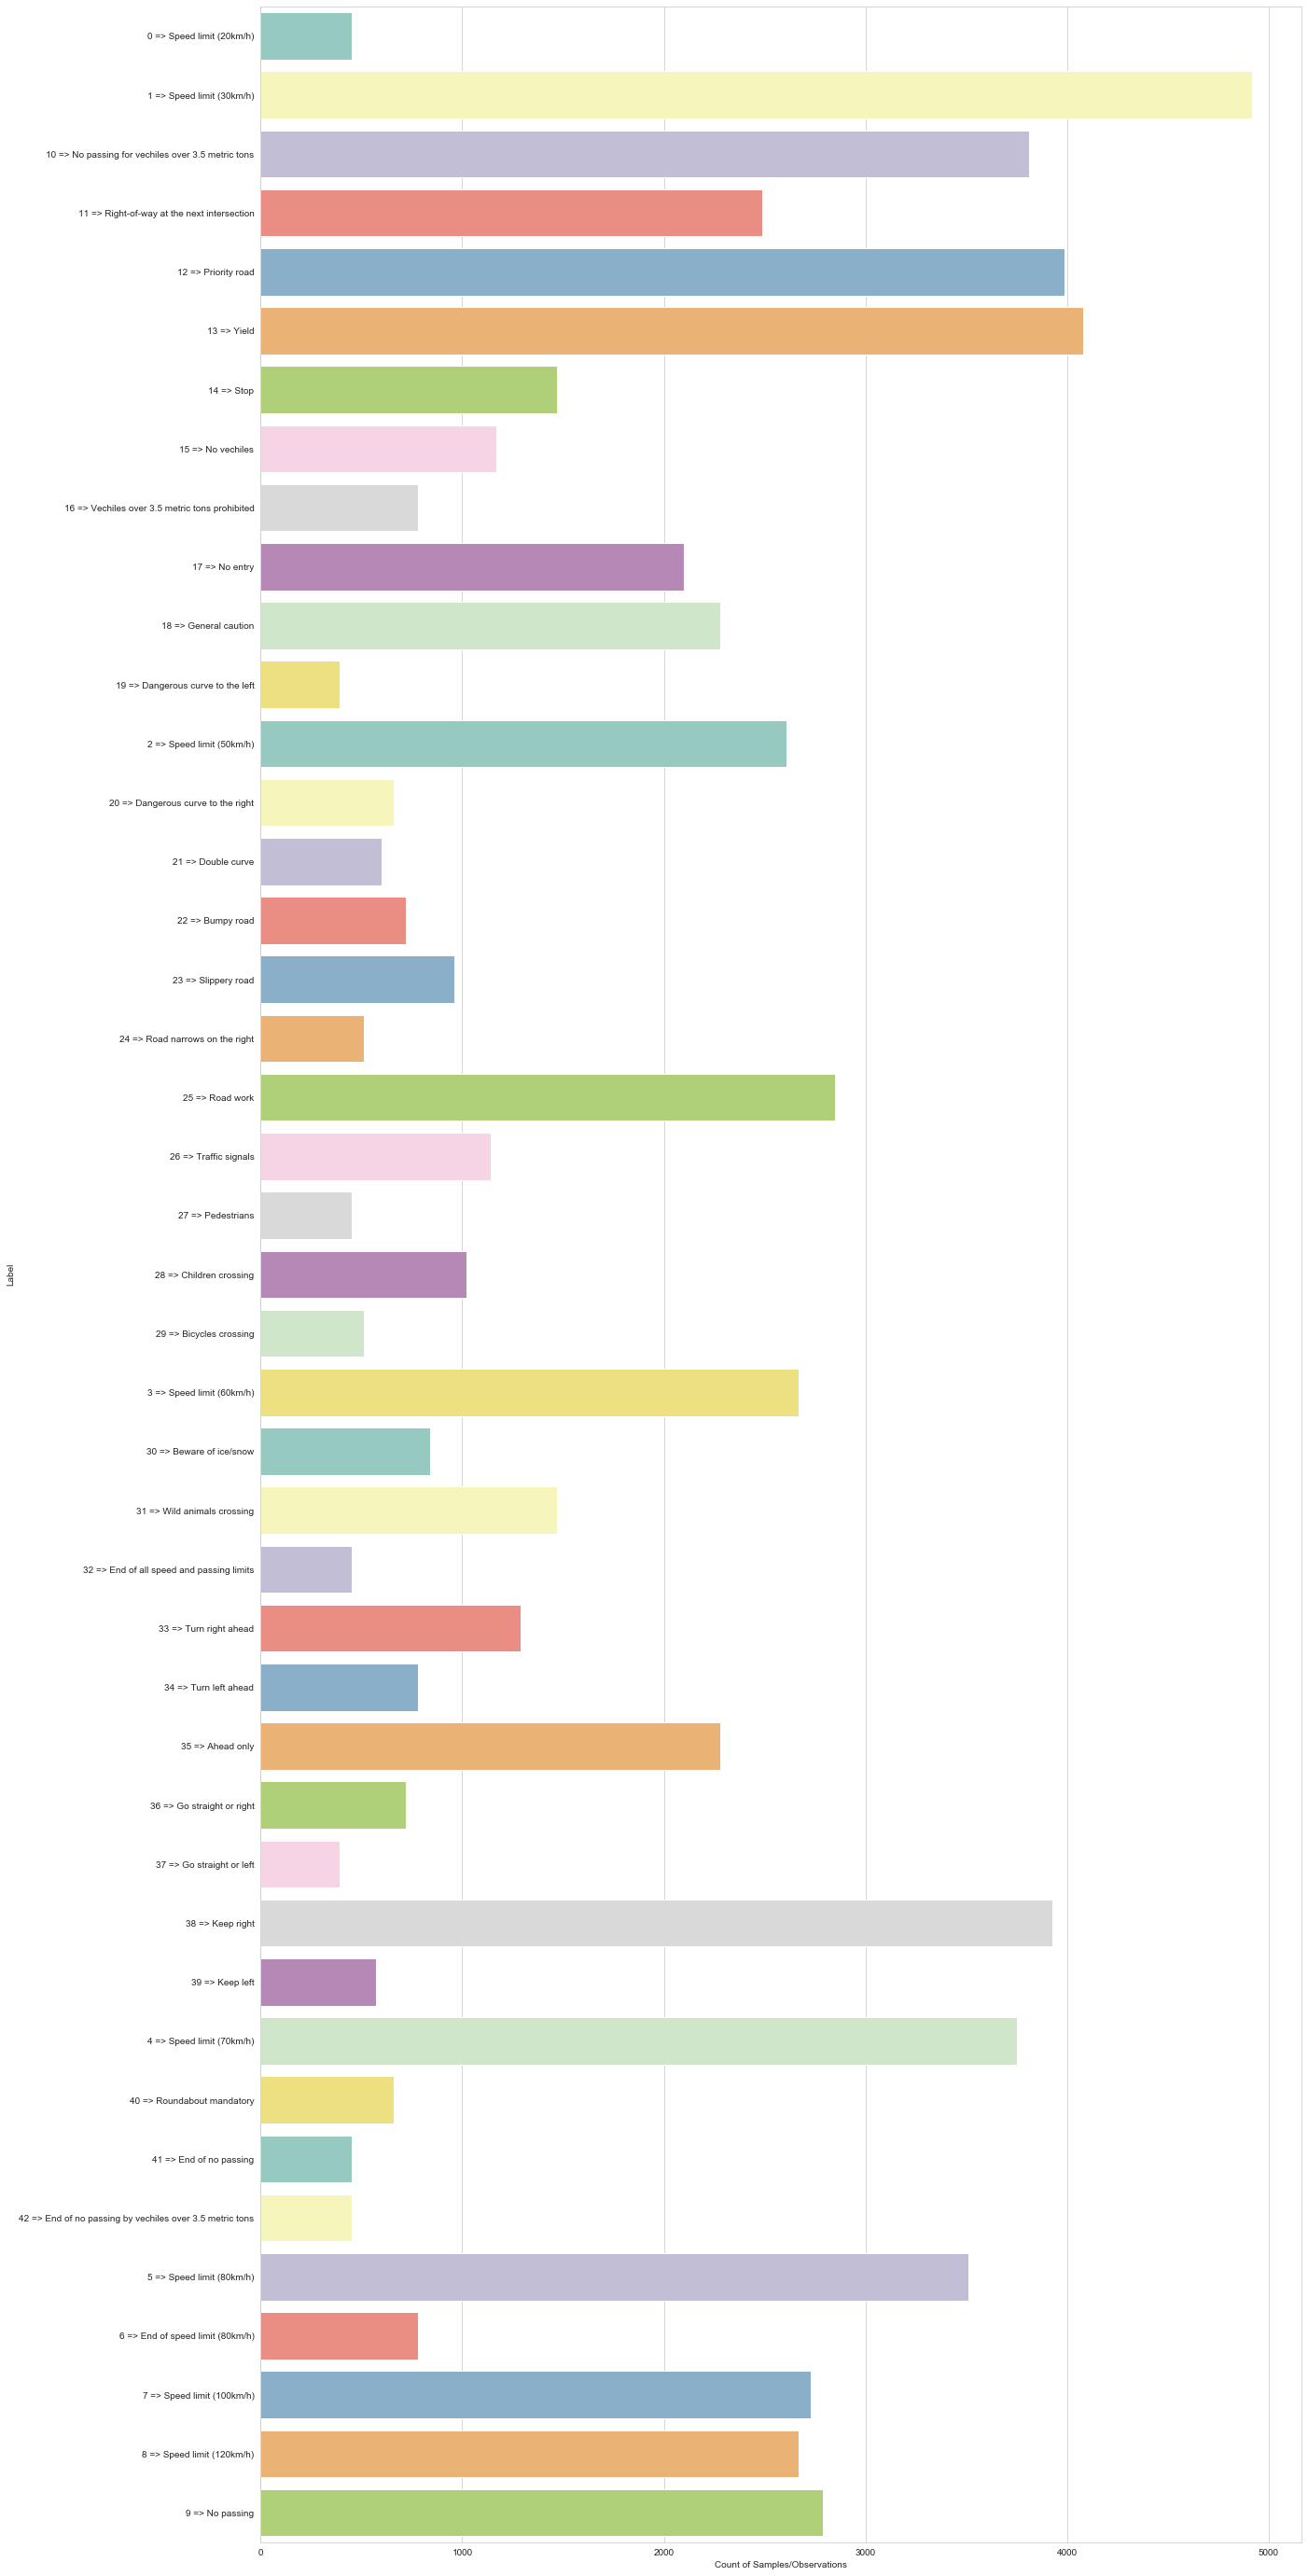

In [5]:
#每个类别的数量可视化
plt.figure(figsize = (20, 50))
sns.barplot(y = list(d.keys()), x = list(d.values()), palette = 'Set3')
plt.ylabel('Label')
plt.xlabel('Count of Samples/Observations');

In [6]:
#图像数字化
nb_classes = len(class_labels.keys())

datagen = ImageDataGenerator()
data = datagen.flow_from_directory(r'D:\Google下载、\traffic\traffic-signs-classification\myData',
                                    target_size=(32, 32),
                                    batch_size=73139,
                                    class_mode='categorical',
                                    shuffle=True )

Found 73139 images belonging to 43 classes.


In [7]:

# next没找到具体用法，而且算的是真慢
X , y = data.next()
# 标签是一个热点编码
print(f"Data Shape   :{X.shape} \n Labels shape :{y.shape}")

Data Shape   :(73139, 32, 32, 3) 
 Labels shape :(73139, 43)


In [80]:
import numpy as np
a = np.array([[2,3],
              [4,5],
              [6,7]])
for i,j in enumerate(a.flat):
    print(i,j)

0 2
1 3
2 4
3 5
4 6
5 7


In [81]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
list(enumerate(seasons))


[(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]

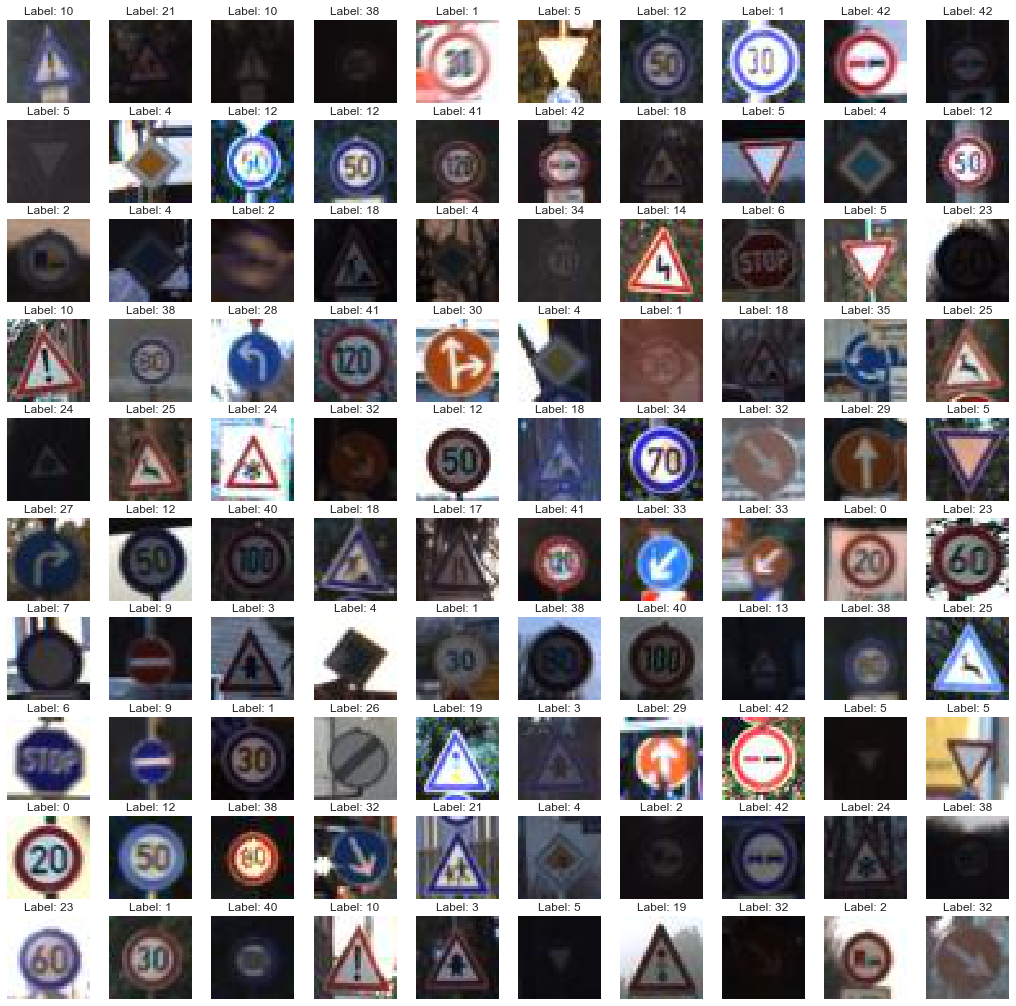

In [8]:
# 图像展示 带有标签
fig, axes = plt.subplots(10,10, figsize=(18,18))
#enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
#seasons = ['Spring', 'Summer', 'Fall', 'Winter']
#list(enumerate(seasons))
#[(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X.shape[0])
    ax.imshow(X[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Label: '+str(np.argmax(y[r])))

In [10]:
# 按照random_state=11的标准打乱顺序后再分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [12]:
#查看数据
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((58511, 32, 32, 3), (14628, 32, 32, 3), (58511, 43), (14628, 43))

E:\AS\anaconda\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [31]:
#引入resnet50网络架构
#定制ResNet50模型
from tensorflow.keras.applications.resnet50 import ResNet50
resnet = ResNet50(weights= None, 
                  include_top=False,
                  input_shape= (30,30,3))

x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(nb_classes, activation= 'softmax')(x)
model = Model(inputs = resnet.input, outputs = predictions)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [32]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
______________________________________________________________________________________________

In [33]:
#模型编译
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
#创建回调filepath: 字符串，保存模型的路径。
''' keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
  monitor: 被监测的数据。
  verbose: 详细信息模式，0 或者 1 。
  save_best_only: 如果 save_best_only=True， 被监测数据的最佳模型就不会被覆盖。
  mode: {auto, min, max} 的其中之一。 如果 save_best_only=True，那么是否覆盖保存文件的决定就取决于被监测数据的最大或者最小值。
        对于 val_acc，模式就会是 max，而对于 val_loss，模式就需要是 min，等等。 
        在 auto 模式中，方向会自动从被监测的数据的名字中判断出来。'''
model_check = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')

'''keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
    monitor: 被监测的数据。
    min_delta: 在被监测的数据中被认为是提升的最小变化， 例如，小于 min_delta 的绝对变化会被认为没有提升。
    patience: 没有进步的训练轮数，在这之后训练就会被停止。
    verbose: 详细信息模式。
    mode: {auto, min, max} 其中之一。 在 min 模式中， 当被监测的数据停止下降，训练就会停止；在 max 模式中，当被监测的数据停止上升，训练就会停止；在 auto 模式中，方向会自动从被监测的数据的名字中判断出来。
    baseline: 要监控的数量的基准值。 如果模型没有显示基准的改善，训练将停止。
    restore_best_weights: 是否从具有监测数量的最佳值的时期恢复模型权重。 如果为 False，则使用在训练的最后一步获得的模型权重。

'''
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=0, mode='max', restore_best_weights=True)

'''keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
monitor: 被监测的数据。
factor: 学习速率被降低的因数。新的学习速率 = 学习速率 * 因数
patience: 没有进步的训练轮数，在这之后训练速率会被降低。
verbose: 整数。0：安静，1：更新信息。
mode: {auto, min, max} 其中之一。如果是 min 模式，学习速率会被降低如果被监测的数据已经停止下降； 在 max 模式，学习塑料会被降低如果被监测的数据已经停止上升； 在 auto 模式，方向会被从被监测的数据中自动推断出来。
min_delta: 对于测量新的最优化的阀值，只关注巨大的改变。
cooldown: 在学习速率被降低之后，重新恢复正常操作之前等待的训练轮数量。
min_lr: 学习速率的下边界。
'''
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
'''keras.callbacks.CSVLogger(filename, separator=',', append=False)
filename: csv 文件的文件名，例如 'run/log.csv'。
separator: 用来隔离 csv 文件中元素的字符串。
append: True：如果文件存在则增加（可以被用于继续训练）。False：覆盖存在的文件。
'''

csv_logger = CSVLogger('train_log.csv', separator=',')

In [41]:
#训练模型  训练100次可以到0.99多
n_epochs = 15
history =  model.fit(X_train, y_train,  batch_size = 32, epochs = n_epochs, verbose = 1, 
              validation_data = (X_test, y_test), callbacks = [32,32,3])

Train on 58511 samples, validate on 14628 samples
Epoch 1/15
58511/58511 [==============================] - 569s 10ms/sample - loss: 1.8256 - acc: 0.6454 - val_loss: 1.9620 - val_acc: 0.5870
Epoch 2/15
58511/58511 [==============================] - 163s 3ms/sample - loss: 0.7882 - acc: 0.8004 - val_loss: 0.2235 - val_acc: 0.9275
Epoch 3/15
58511/58511 [==============================] - 163s 3ms/sample - loss: 0.4268 - acc: 0.8901 - val_loss: 0.3114 - val_acc: 0.9002
Epoch 4/15
58511/58511 [==============================] - 161s 3ms/sample - loss: 0.2312 - acc: 0.9373 - val_loss: 0.0987 - val_acc: 0.9711
Epoch 5/15
58511/58511 [==============================] - 161s 3ms/sample - loss: 0.2122 - acc: 0.9469 - val_loss: 0.3844 - val_acc: 0.8799
Epoch 6/15
58511/58511 [==============================] - 161s 3ms/sample - loss: 0.2890 - acc: 0.9352 - val_loss: 0.3665 - val_acc: 0.8910
Epoch 7/15
58511/58511 [==============================] - 160s 3ms/sample - loss: 0.2462 - acc: 0.9441 - val_

In [42]:
# Saving the model
model.save('TSC_model.h5')

In [43]:
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy: ', acc, '\nLoss    : ', loss)

14628/14628 [==============================] - 9s 610us/sample - loss: 0.8218 - acc: 0.9761
Accuracy:  0.97614163 
Loss    :  0.8217737872334988


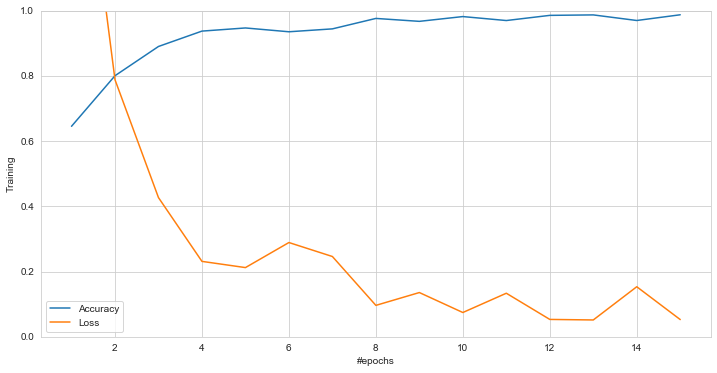

In [46]:
#模型结果分析
#精度和损失值的图像
q = len(list(history.history['loss']))
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['acc'], label = 'Accuracy')
sns.lineplot(x = range(1, 1+q), y = history.history['loss'], label = 'Loss')
plt.xlabel('#epochs')
plt.ylabel('Training')
plt.ylim((0, 1))
plt.legend();

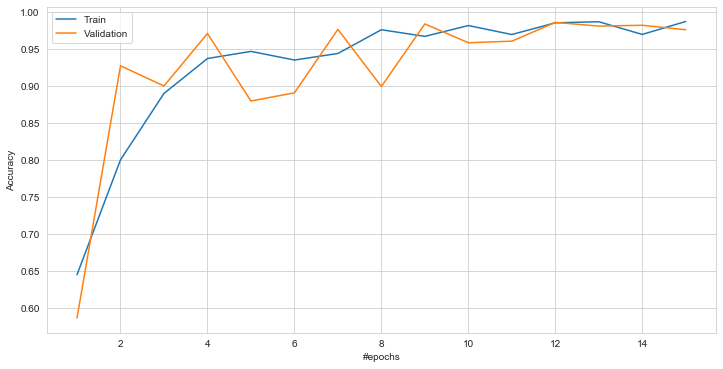

In [49]:
#训练精度和验证精度
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['acc'], label = 'Train')
sns.lineplot(x = range(1, 1+q), y = history.history['val_acc'], label = 'Validation')
plt.xlabel('#epochs')
plt.ylabel('Accuracy')
plt.legend();

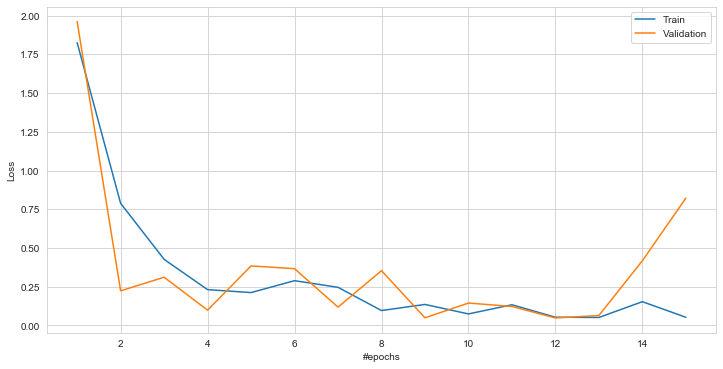

In [50]:
#训练损失和验证损失
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['loss'], label = 'Train')
sns.lineplot(x = range(1, 1+q), y = history.history['val_loss'], label = 'Validation')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend();

In [85]:
%%time
pred = np.argmax(model.predict(X_test), axis = 1)

Wall time: 1min 47s


In [54]:
#sklearn中的classification_report函数用于显示主要分类指标的文本报告．在报告中显示每个类的精确度，召回率，F1值等信息。  F1值 = 正确率 * 召回率 * 2 / (正确率 + 召回率)
print(classification_report(np.argmax(y_test, axis = 1), pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        87
           1       0.99      0.98      0.99      1007
           2       0.98      1.00      0.99       800
           3       1.00      0.99      0.99       501
           4       1.00      0.99      0.99       819
           5       0.99      1.00      1.00       817
           6       1.00      0.99      1.00       309
           7       1.00      1.00      1.00       243
           8       1.00      0.99      1.00       150
           9       0.99      0.56      0.72       405
          10       0.96      1.00      0.98       473
          11       0.97      0.99      0.98        68
          12       0.96      0.98      0.97       513
          13       0.98      0.96      0.97       149
          14       0.97      1.00      0.99       133
          15       1.00      1.00      1.00       133
          16       0.97      0.98      0.98       187
          17       1.00    

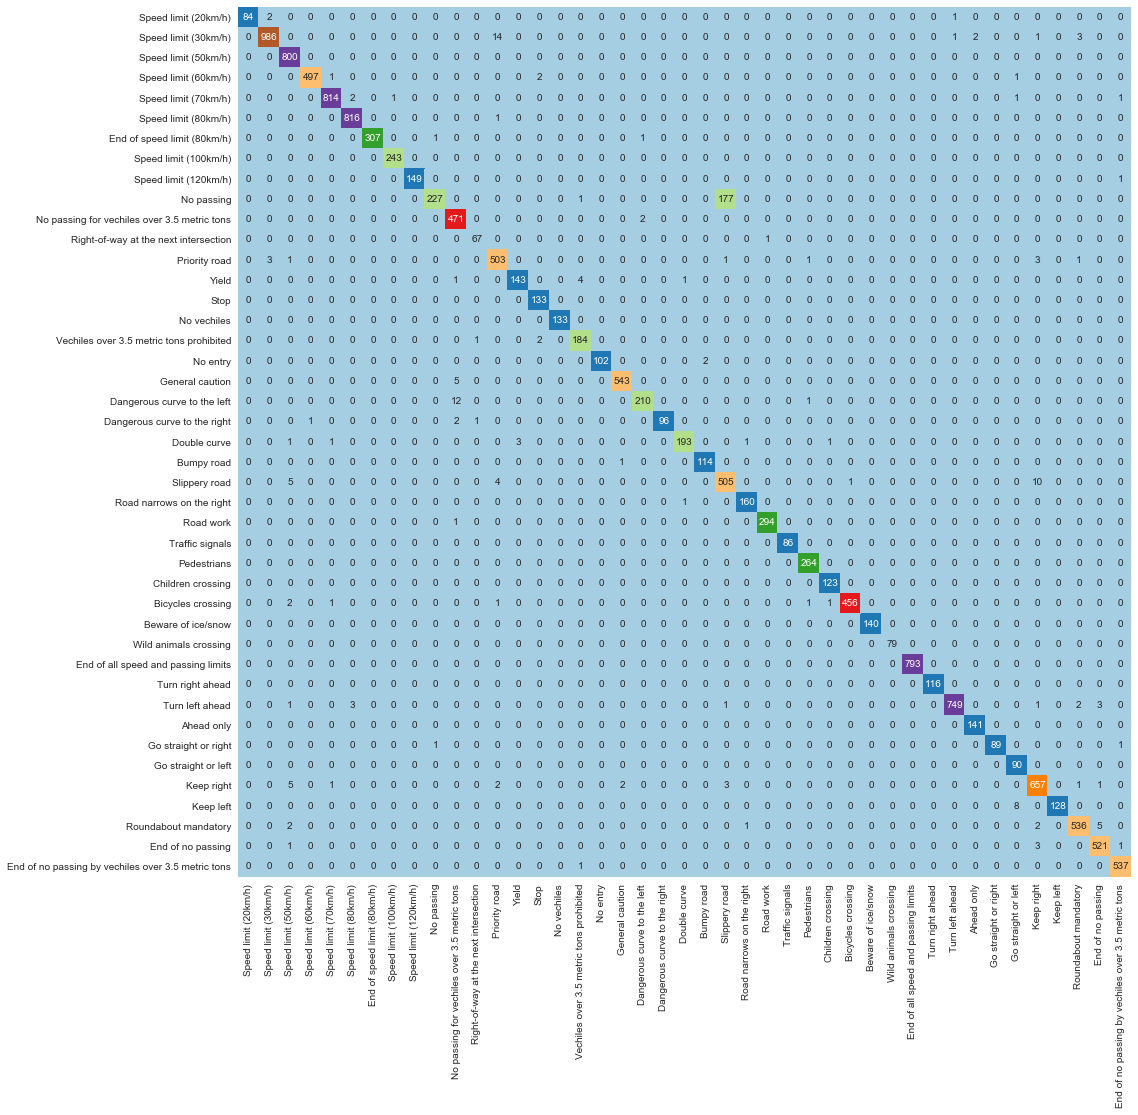

In [87]:
# 混淆矩阵
cmat = confusion_matrix(np.argmax(y_test, axis=1), pred)
labels = [class_labels[i] for i in range(43)]
plt.figure(figsize=(16,16))
sns.heatmap(cmat, annot = True, cbar = False, cmap='Paired', fmt="d", xticklabels=labels, yticklabels=labels);

In [56]:
# 每一类的准确率
classwise_acc = cmat.diagonal()/cmat.sum(axis=1) * 100 
cls_acc = pd.DataFrame({'Class_Label':[class_labels[i] for i in range(43)], 'Accuracy': classwise_acc.tolist()}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')


Class_Label,Accuracy
Speed limit (20km/h),96.55
Speed limit (30km/h),97.91
Speed limit (50km/h),100.00
Speed limit (60km/h),99.20
Speed limit (70km/h),99.39
Speed limit (80km/h),99.88
End of speed limit (80km/h),99.35
Speed limit (100km/h),100.00
Speed limit (120km/h),99.33
No passing,56.05


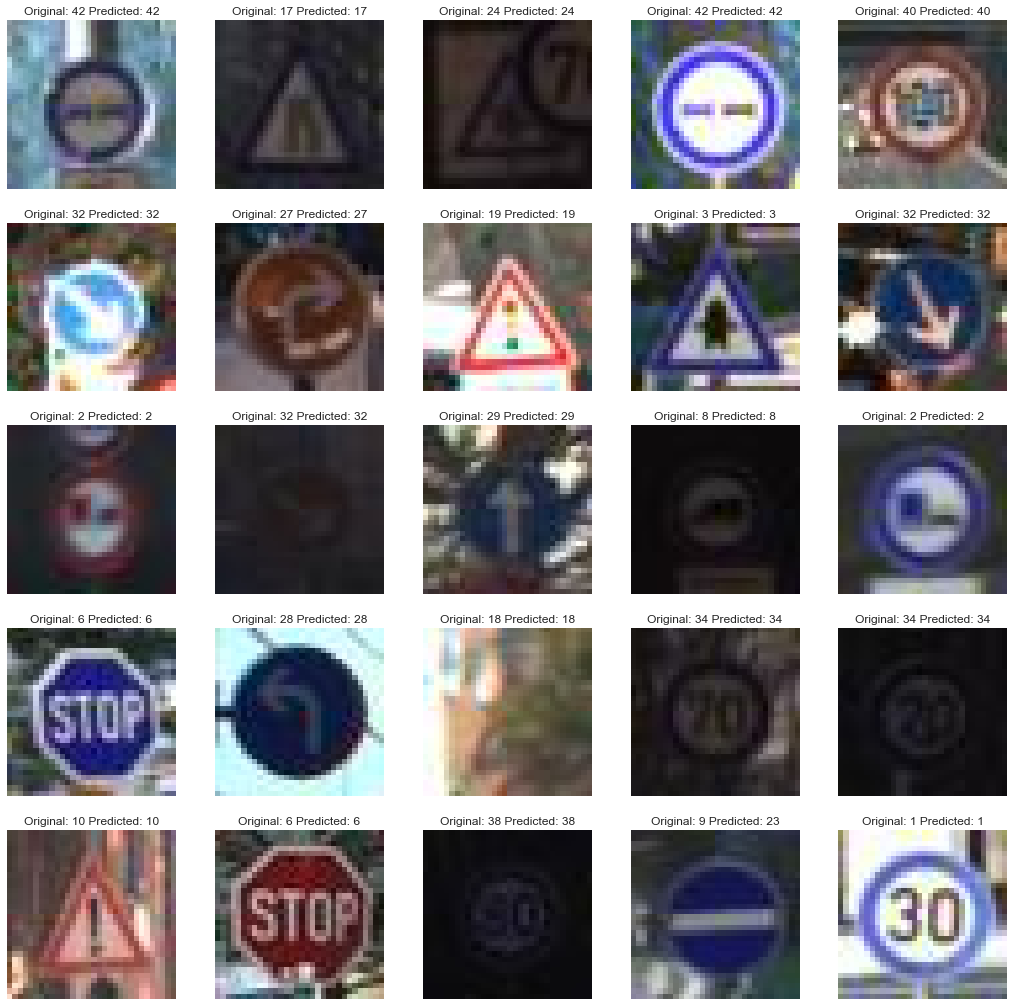

In [57]:
#看不见的数据的预测
fig, axes = plt.subplots(5,5, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X_test.shape[0])
    ax.imshow(X_test[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Original: {} Predicted: {}'.format(np.argmax(y_test[r]), np.argmax(model.predict(X_test[r].reshape(1, 32, 32, 3)))))